# Рынок заведений общественного питания Москвы

**Цель проекта:** В Москве планируется открытие новго кафе. Оно оригинальное — гостей должны обслуживать роботы. Инвесторов интересует текущее положение дел на рынке — сможет ли данное заведние снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов.  
Необходимо подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

## План проекта

**Часть 1. Предобработка данных**  
**Часть 2. Анализ данных**

    2.1. Соотношение видов объектов общественного питания по количеству
    2.2. Соотношение сетевых и несетевых заведений по количеству
    2.3. Для какого вида объекта общественного питания характерно сетевое распространение?
    2.4. Что характерно для сетевых заведений?
    2.5. Среднее количество посадочных мест для каждого вида объекта общественного
    2.6. Топ-10 улиц по количеству объектов общественного питания
    2.7. Число улиц с одним объектом общественного питания.
    2.8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания
    
**Часть 3. Выводы**

### Часть 1. Предобработка данных

In [1]:
#загрузим библиотеки и датасет
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go


#забегая вперед, сразу загружу датасет с указанием районов для каждого адреса
from io import BytesIO
import requests
spreadsheet_id = '17d8aEpV2zn2UoORgtw2iDIWFgt2E1I9ltadxH09wv_U'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r=requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))

In [2]:
#посмторим на данные
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15391 non-null  int64 
 1   object_name  15391 non-null  object
 2   chain        15391 non-null  object
 3   object_type  15391 non-null  object
 4   address      15391 non-null  object
 5   number       15391 non-null  int64 
 6   district     15167 non-null  object
dtypes: int64(2), object(5)
memory usage: 841.8+ KB


,id,object_name,chain,object_type,address,number,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,Ярославский
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,Таганский
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Таганский
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Лианозово


In [3]:
df.isna().sum()

id               0
object_name      0
chain            0
object_type      0
address          0
number           0
district       224
dtype: int64

In [4]:
#Удалим пропуски
df = df.dropna()

In [5]:
#проверим на дубликаты
df.duplicated().sum()

25

In [6]:
#удалим дубликаты
df = df.drop_duplicates().reset_index(drop=True)

Получили датасет, готовый к дальнейшему анализу

### Часть 2. Анализ данных

#### 2.1. Соотношение видов объектов общественного питания по количеству

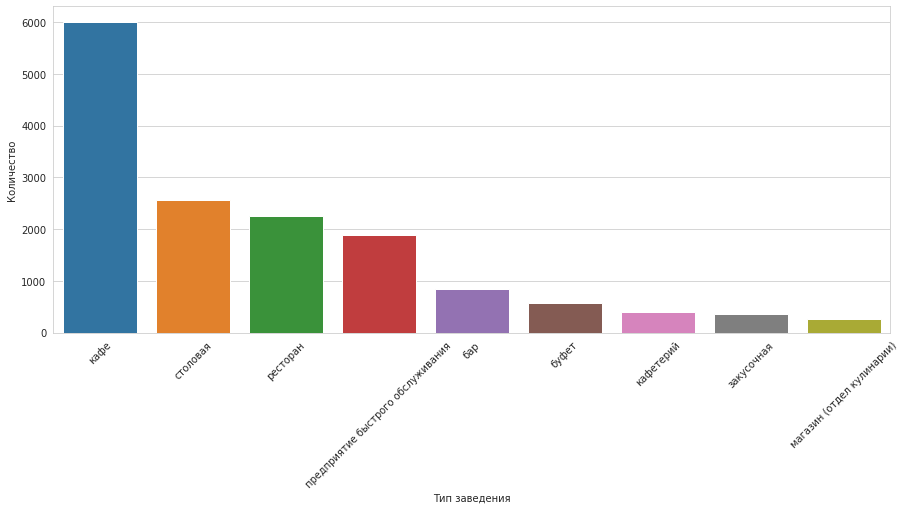

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(data = df.groupby(['object_type'])['id'].count().reset_index().sort_values(by='id',ascending = False),
                   x = 'object_type',
                   y = 'id'
)
plot.set_xlabel('Тип заведения')
plot.set_ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Вывод: наибольшее количество заведений имеют типы заведений `кафе, столовая, ресторан` и `ПБО`

#### 2.2. Соотношение сетевых и несетевых заведений по количеству

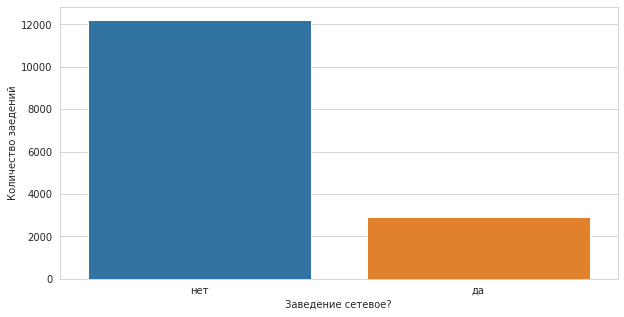

In [9]:
plt.figure(figsize=(10,5))
plot = sns.barplot(data = df.groupby('chain')['id'].count().reset_index().sort_values(by = 'id',ascending = False),
                   x = 'chain',
                   y = 'id'
)
plot.set_xlabel('Заведение сетевое?')
plot.set_ylabel('Количество заедений')
plt.show()

Вывод: подавляющее большинство заведений не являются сетевыми

#### 2.3. Для какого вида объекта общественного питания характерно сетевое распространение?

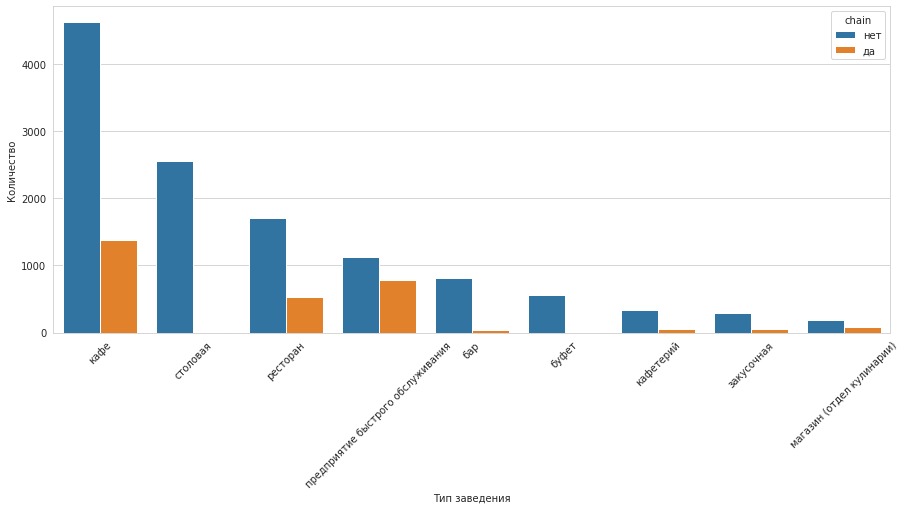

In [12]:
plt.figure(figsize=(15,6))
plot = sns.barplot(data = df.groupby(['object_type','chain'])['id'].count().reset_index().sort_values(by='id',ascending = False),
                   x = 'object_type',
                   y = 'id',
                   hue = 'chain'
)
plot.set_xlabel('Тип заведения')
plot.set_ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Вывод: сетевое распространение характерно для таких типов заведений как `кафе, ресторан` и `ПБО`

#### 2.4. Что характерно для сетевых заведений?

In [13]:
#получим датасет по сетевым заведениям
chain_yes = df[df['chain'] == 'да']

In [14]:
print(
    'В среднем на одну сеть приходится {:.0f} заведения'
    .format(chain_yes.groupby('object_name')['id'].count().reset_index()['id'].mean())
)

В среднем на одну сеть приходится 4 заведения


In [15]:
print(
    'В среднем каждое сетевое предприятие имеет {:.0f} посадочное место'
    .format(chain_yes.groupby('object_name')['number'].mean().reset_index()['number'].mean())
     )

В среднем каждое сетевое предприятие имеет 61 посадочное место


In [18]:
#подробнее рассмотрим количество заведений в сетях
chain_yes_counts = df[df['chain'] == 'да'].groupby('object_name')['id'].count().reset_index().sort_values(by='id',ascending=False).rename(columns = {'id':'count'})

In [20]:
chain_yes_counts.describe(percentiles=[0.85, 0.90,0.95, 0.99])

,count
count,716.000000
mean,4.094972
std,12.575342
min,1.000000
50%,1.000000
85%,4.000000
90%,6.500000
95%,12.250000
99%,63.550000
max,155.000000


Вывод: для сетевых заведений в среднем характерно `малое количсетво заведений` и `небольшое количество посадочных мест`. Это мне кажется логичны, т.к. основная часть сетевых заведений приходится на `кафе, рестораны` и `ПБО`. Посмотрим на перцентили.

#### 2.5. Среднее количество посадочных мест для каждого вида объекта общественного питания

In [79]:
chain_yes.groupby('object_type')['number'].mean().sort_values(ascending = False).reset_index()

,object_type,number
0,столовая,112.333333
1,ресторан,100.301676
2,бар,53.027027
3,кафе,47.207670
4,предприятие быстрого обслуживания,40.268983
5,закусочная,14.375000
6,буфет,12.727273
7,кафетерий,12.176471
8,магазин (отдел кулинарии),8.679487


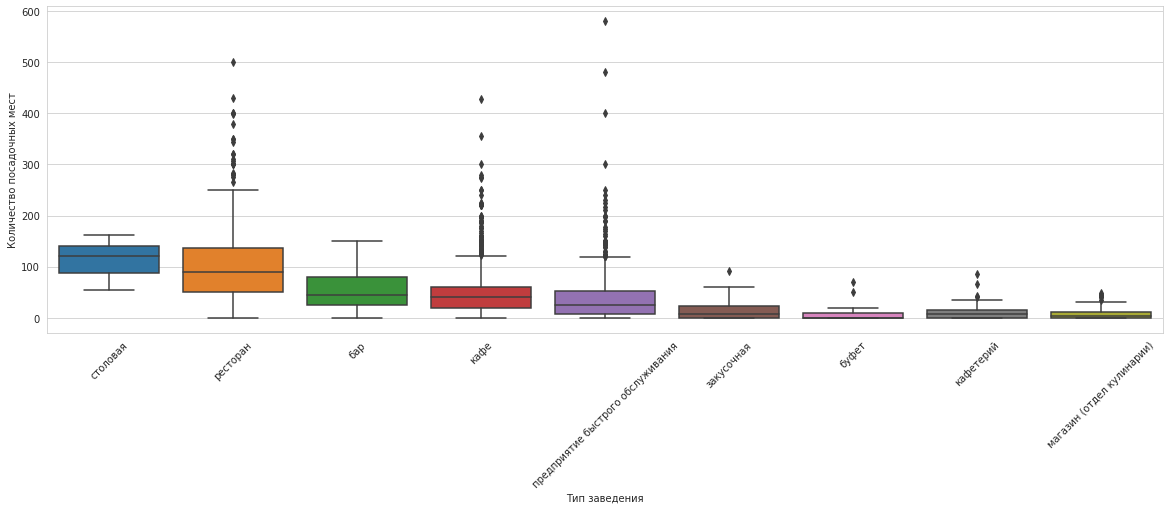

In [75]:
plt.figure(figsize=(20,6))
plot = sns.boxplot(data = chain_yes, x = 'object_type', y = 'number', order=chain_yes.groupby('object_type')['number'].mean().sort_values(ascending = False).reset_index().object_type.unique())
plt.xticks(rotation=45)

plot.set_xlabel('Тип заведения')
plot.set_ylabel('Количество посадочных мест')
plt.show()

Вывод: в среднем, самое большое количество посадочных мест предоставляет `столовая`, но `рестораны`, `кафе` и `ПБО` имеют выбросы, в виде заведений с гораздо большим количеством мест.

#### 2.6. Топ-10 улиц по количеству объектов общественного питания

In [80]:
#из переменной адреса получим улицу
f = lambda x: x['address'].split(sep=',')[1]
df["street"] = df.apply(f, axis=1).str.lstrip()

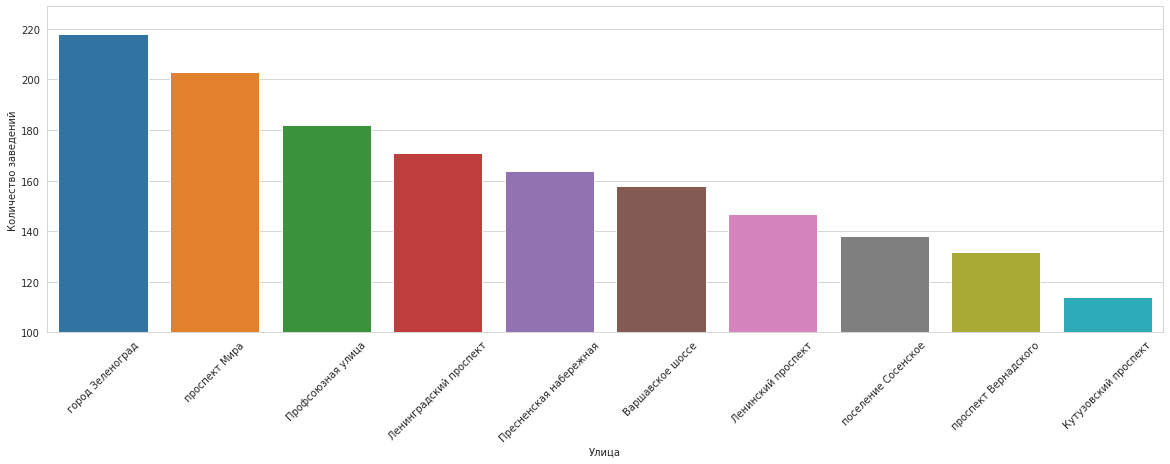

In [85]:
plt.figure(figsize=(20,6))
plot = sns.barplot(data = df.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending = False).head(10), x = 'street', y = 'id')
plot.set(ylim=(100, None))
plt.xticks(rotation=45)
plot.set_xlabel('Улица')
plot.set_ylabel('Количество заведений')
plt.show()

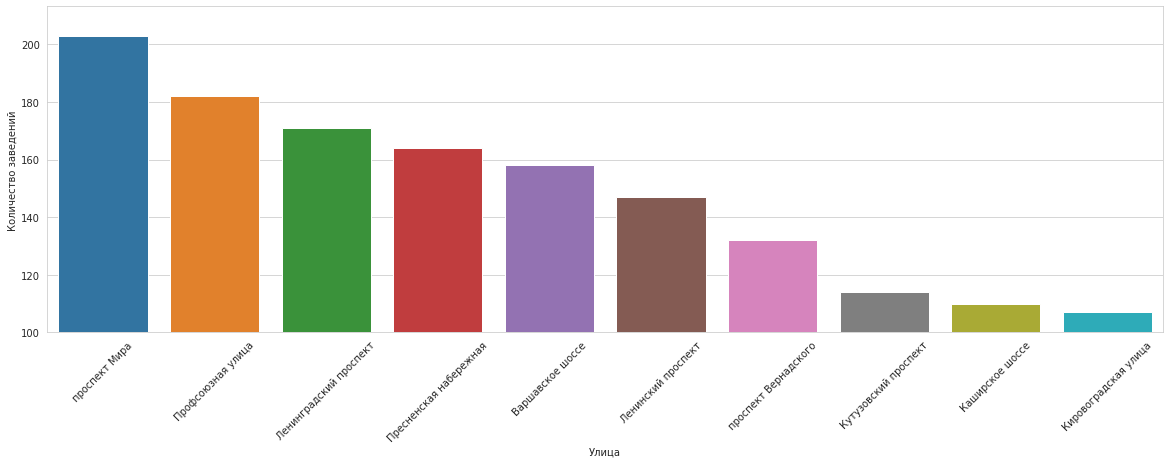

In [86]:
#построим график именно по улицам
plt.figure(figsize=(20,6))
plot = sns.barplot(data = df.query("street != 'город Зеленоград' and street != 'поселение Сосенское'").groupby('street')['id'].count().reset_index().sort_values(by='id', ascending = False).head(10), x = 'street', y = 'id')
plot.set(ylim=(100, None))
plt.xticks(rotation=45)
plot.set_xlabel('Улица')
plot.set_ylabel('Количество заведений')
plt.show()

In [88]:
#получим районы для топ-10 улиц по количеству заведений
top_10 = df.query("street != 'город Зеленоград' and street != 'поселение Сосенское'").\
groupby('street')['id'].count().reset_index().sort_values(by='id', ascending = False).head(10)['street']

In [91]:
print("Топ-10 улиц находятся в следующих районах Москвы:",*df[df['street'].isin(top_10)]['district'].unique(), sep = "\n")

Топ-10 улиц находятся в следующих районах Москвы:
 Донской
 Нагорный
 Чертаново Южное
 Гагаринский
 Ломоносовский
 Проспект Вернадского
 Тропарево-Никулино
 Фили-Давыдково
 Нагатино-Садовники
 Москворечье-Сабурово
 Чертаново Центральное
 Дорогомилово
 Беговой
 Аэропорт
 Сокол
 Якиманка
 Обручевский
 Мещанский
 Останкинский
 Алексеевский
 Академический
 Черемушки
 Коньково
 Теплый Стан
 Орехово-Борисово Южное
 Чертаново Северное
 Хорошевский
 Орехово-Борисово Северное
 Ростокино
 Свиблово
 Ясенево
 Южное Бутово
 Раменки
 Пресненский
 Ярославский


Вывод: число районов гораздо больше, чем количество улиц. Данные улицы (в основном проспекты и шоссе) характерны большой протяженностью, наверняка это и является причиной большого количества заведений. А так же в списке этих районов нет ни одного района, относящегося к ЦАО

#### 2.7. Число улиц с одним объектом общественного питания.

In [92]:
#получим список улиц с одним заведением
one_place1 = df.groupby('street')['id'].count().reset_index()
one_place2 = one_place1[one_place1['id'] == 1]['street']

In [93]:
#посчитаем количество улиц
otvet = df[df['street'].isin(one_place2)].groupby('district')['id'].count().reset_index().sort_values(by = 'id',ascending = False).shape[0]
print('Количество улиц с 1 заведением: {}'.format(otvet))

Количество улиц с 1 заведением: 102


In [94]:
#посмотрим в каких районах больше всего улиц с 1 заведением
df[df['street'].isin(one_place2)].groupby('district')['id'].count().reset_index().sort_values(by = 'id',ascending = False).head(10)

,district,id
80,Таганский,27
87,Хамовники,26
5,Басманный,22
81,Тверской,20
65,Пресненский,19
43,Марьина Роща,17
77,Сокольники,14
46,Мещанский,13
24,Замоскворечье,12
76,Соколиная Гора,12


In [95]:
t = df[df['street'].isin(one_place2)].groupby('district')['id'].count().reset_index().sort_values(by = 'id',ascending = False).head(10)

Вывод: районы с наибольшим числом улиц с одним заведением находятся в районах, относящихся к ЦАО

#### 2.8. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [97]:
#получим список топ-50 улиц по количеству заведений
top_50 = df.query("street != 'город Зеленоград' and street != 'поселение Сосенское'").\
groupby('street')['id'].count().reset_index().sort_values(by='id', ascending = False).head(50)['street']

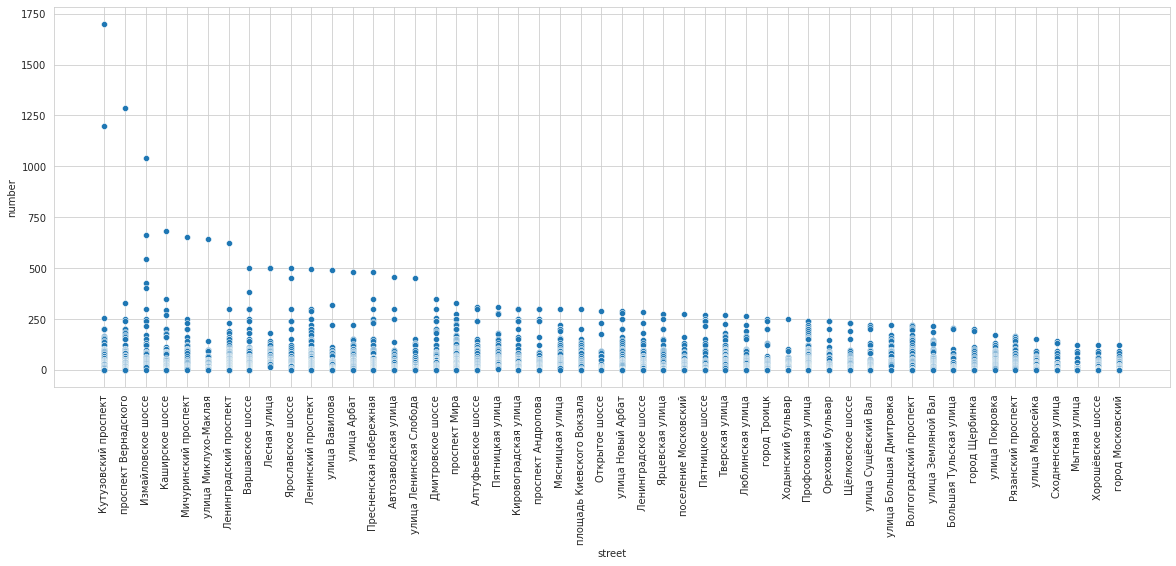

In [105]:
plt.figure(figsize=(20,7))
sns.scatterplot(data = df[df['street'].isin(top_50)].sort_values(by = 'number', ascending = False),
                x = 'street',
                y = 'number')
plt.xticks(rotation=90)
plot.set_xlabel('Улица')
plot.set_ylabel('Количество посадочных мест')
plt.show()

In [106]:
#попробуем избавиться от выбросов
np.percentile(df[df['street'].isin(top_50)]['number'], 95)

180.0

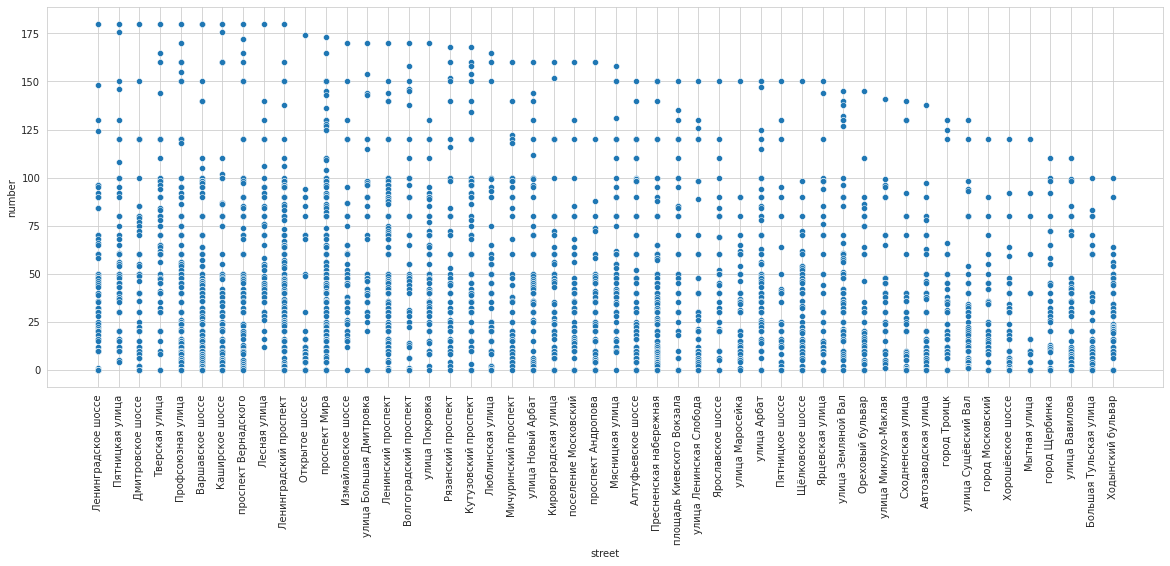

In [107]:
plt.figure(figsize=(20,7))
sns.scatterplot(data = df.query('street in @top_50 and number <= 180').sort_values(by = 'number', ascending = False),
                x = 'street',
                y = 'number')
plt.xticks(rotation=90)
plot.set_xlabel('Улица')
plot.set_ylabel('Количество посадочных мест')
plt.show()

Вывод: полученный график говорит о том, что количество посадочных мест не зависит от количества заведений на улице

#### 3. Выводы

- используя внешнюю информацию были получены данные о районах, в которых находятся заведения
- были предобработаны данные (удалены дубликаты и пропуски)
- самыми популярными заведениями оказались `кафе, столовые, рестораны` и `ПБО`
- `несетевых` заведений гораздо больше, чем `сетевых`
- сетевые заведения характерны для `кафе, ресторанов` и `ПБО`
- в среднем на одну сеть приходится `4 заведения` и `61 посадочное место`
- наибольшее количество посадочных мест предоставляет `столовая`, наименьшее - `кулнария`
- улицами с наибольшим количеством заведений оказались в основном `проспекты и шоссе`, которые характеризуются большой протяженностью
- улицы с одним заведение сконцентрированны в центре города
- количество посадочных мест не зависит от количества заведений на улице

#### Рекомендации

Думаю, что для заведения с роботами - официантами больше подойдет центр города, как место с меньшим количеством заведений, а значит меньшей конкуренцией.